# Import libraries


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import f_oneway
import numpy as np
from scipy.stats import skew


In [6]:
# Load the data into a pandas DataFrames
df_2021_paid_0 = pd.read_csv("minutes_watched_2021_paid_0.csv")
df_2022_paid_0 = pd.read_csv("minutes_watched_2022_paid_0.csv")
df_2021_paid_1 = pd.read_csv("minutes_watched_2021_paid_1.csv")
df_2022_paid_1 = pd.read_csv("minutes_watched_2022_paid_1.csv")

In [8]:

# Perform an initial data exploration by displaying the first few rows of each DataFrame
print("2021 Paid 0:")
print(df_2021_paid_0.head())

print("\n2022 Paid 0:")
print(df_2022_paid_0.head())

print("\n2021 Paid 1:")
print(df_2021_paid_1.head())

print("\n2022 Paid 1:")
print(df_2022_paid_1.head())

2021 Paid 0:
   student_id  minutes_watched  paid_in_q2
0           9             0.13           0
1          16             4.00           0
2          19             4.90           0
3          20             0.73           0
4          21             0.17           0

2022 Paid 0:
   student_id  minutes_watched  paid_in_q2
0           9             0.53           0
1          67            54.07           0
2         144             0.40           0
3         209            29.17           0
4         389             0.30           0

2021 Paid 1:
   student_id  minutes_watched  paid_in_q2
0           6           162.07           1
1         221           938.13           1
2         516            92.53           1
3         520           182.37           1
4         523          2644.50           1

2022 Paid 1:
   student_id  minutes_watched  paid_in_q2
0           6           134.17           1
1          31           348.40           1
2         182          4037.73           1

Text(0.5, 1.0, '2022 Paid 1')

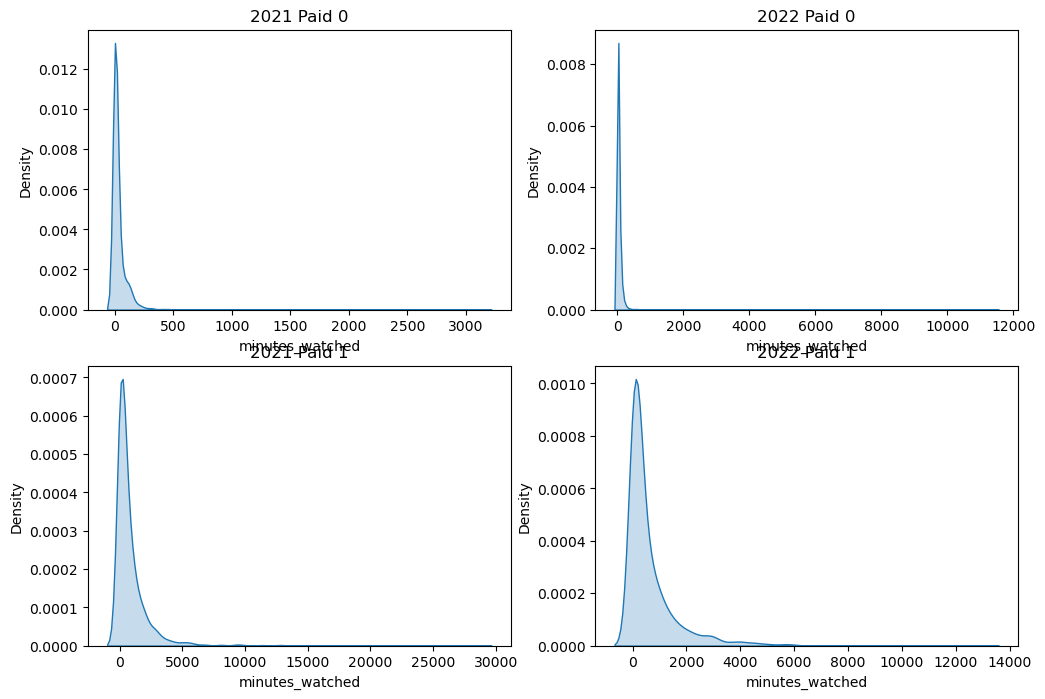

In [16]:
# Plot the distributions using seaborn's kdeplot() method we create four subplots displaying all four distributions simultaneously for better clarity
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.kdeplot(data=df_2021_paid_0, x="minutes_watched", fill=True)
plt.title("2021 Paid 0")

plt.subplot(2,2,2)
sns.kdeplot(data=df_2022_paid_0, x="minutes_watched", fill=True)
plt.title("2022 Paid 0")

plt.subplot(2,2,3)
sns.kdeplot(data=df_2021_paid_1, x="minutes_watched", fill=True)
plt.title("2021 Paid 1")

plt.subplot(2,2,4)
sns.kdeplot(data=df_2022_paid_1, x="minutes_watched", fill=True)
plt.title("2022 Paid 1")

In [18]:
# Define a function to remove outliers and save the filtered data as a CSV file
def remove_and_save_outliers(df, filename):
    # Calculate the 99th percentile of the minutes_watched column
    percentile_99 = df['minutes_watched'].quantile(0.99)

    # Remove outliers by keeping only values lower than the 99th percentile
    df_filtered = df[df['minutes_watched'] <= percentile_99]

    # Save the filtered data as a CSV file
    df_filtered.to_csv(filename, index=False)

In [20]:
# Call the function for each dataset
remove_and_save_outliers(df_2021_paid_0, "minutes_watched_2021_paid_0_no_outliers.csv")
remove_and_save_outliers(df_2022_paid_0, "minutes_watched_2022_paid_0_no_outliers.csv")
remove_and_save_outliers(df_2021_paid_1, "minutes_watched_2021_paid_1_no_outliers.csv")
remove_and_save_outliers(df_2022_paid_1, "minutes_watched_2022_paid_1_no_outliers.csv")

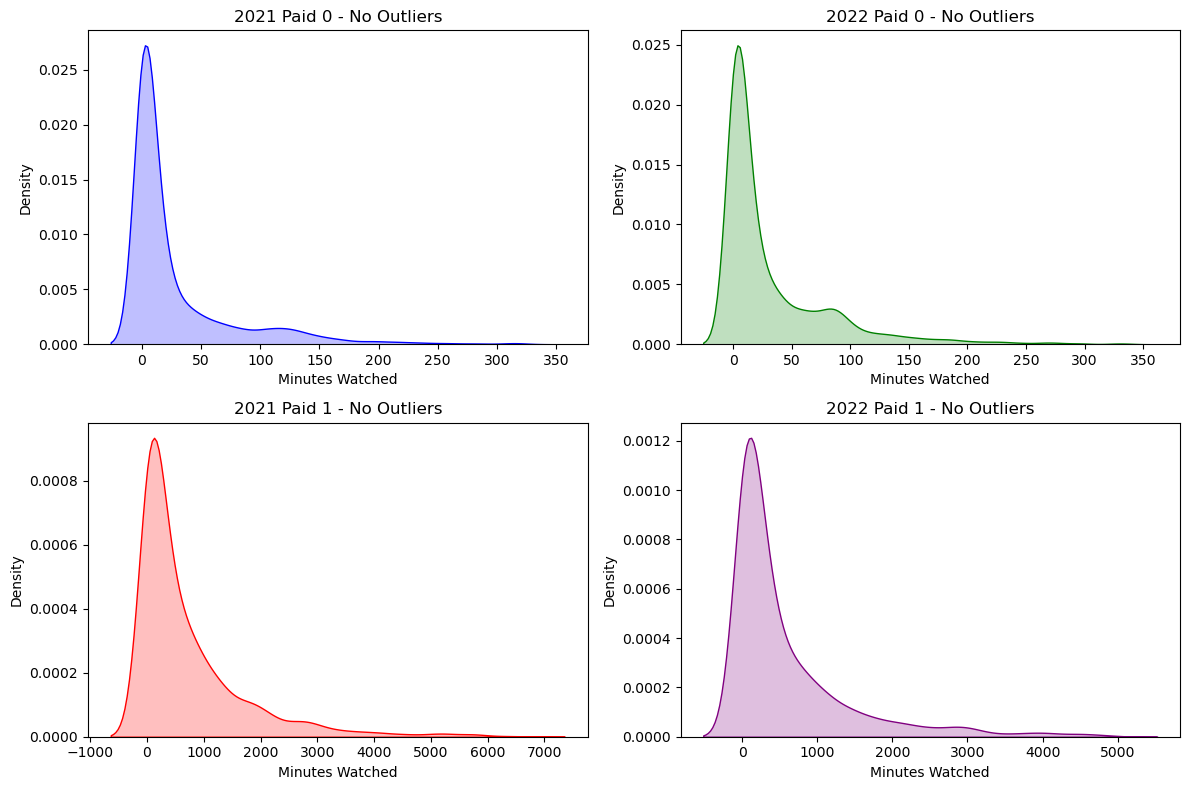

In [22]:
# Load the filtered data
df_2021_paid_0_no_outliers = pd.read_csv("minutes_watched_2021_paid_0_no_outliers.csv")
df_2022_paid_0_no_outliers = pd.read_csv("minutes_watched_2022_paid_0_no_outliers.csv")
df_2021_paid_1_no_outliers = pd.read_csv("minutes_watched_2021_paid_1_no_outliers.csv")
df_2022_paid_1_no_outliers = pd.read_csv("minutes_watched_2022_paid_1_no_outliers.csv")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create KDE plots for each cleaned dataset
sns.kdeplot(data=df_2021_paid_0_no_outliers['minutes_watched'], ax=axes[0, 0], color='blue', fill=True)
axes[0, 0].set_title("2021 Paid 0 - No Outliers")
sns.kdeplot(data=df_2022_paid_0_no_outliers['minutes_watched'], ax=axes[0, 1], color='green', fill=True)
axes[0, 1].set_title("2022 Paid 0 - No Outliers")
sns.kdeplot(data=df_2021_paid_1_no_outliers['minutes_watched'], ax=axes[1, 0], color='red', fill=True)
axes[1, 0].set_title("2021 Paid 1 - No Outliers")
sns.kdeplot(data=df_2022_paid_1_no_outliers['minutes_watched'], ax=axes[1, 1], color='purple', fill=True)
axes[1, 1].set_title("2022 Paid 1 - No Outliers")

# Add labels and titles
for ax in axes.flat:
    ax.set(xlabel="Minutes Watched", ylabel="Density")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

array([-2.6972746 ,  2.44028269,         nan])